# COURSE: A deep understanding of deep learning
## SECTION: FFN
### LECTURE: The MNIST dataset
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\Acer\AppData\Local\Temp\ipykernel_2724\3896895136.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# import dataset (comes with colab!)
data = np.loadtxt(open('mnist_train_small.csv','rb'),delimiter=',')

In [3]:
# shape of the data matrix
data.shape

# 20000 images
# each row is an image's label + image pixels (28x28 = 784)

(20000, 785)

In [4]:
# extract labels from data
labels = data[:,0]
data = data[:,1:]

print(labels.shape)
print(data.shape)

(20000,)
(20000, 784)


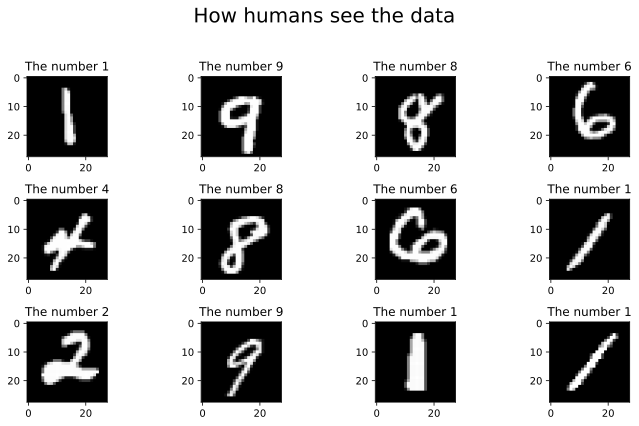

In [5]:
# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten(): # axs is 3 x 4, but we want to loop to its one dimensional shape (flatten to 12)
  # pick a random image's index
  randimg2show = np.random.randint(0,high=data.shape[0])

  # create the image (reshape pixels 784 --> 28x28)
  img = np.reshape(data[randimg2show,:],(28,28))
  ax.imshow(img,cmap='gray')

  # title
  ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How humans see the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

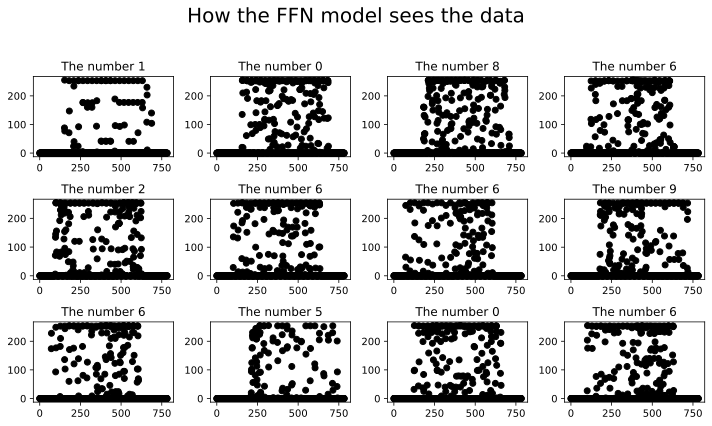

In [6]:
# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  # pick a random image
  randimg2show = np.random.randint(0,high=data.shape[0])

  # create the image
  # JUST PLOTING the VALUE of a pixel (0 --> 255) 
  ax.plot(data[randimg2show,:],'ko')

  # title
  ax.set_title('The number %i'%labels[randimg2show])

# A model sees "pixel values of an 1D array" instead of regular 2d image.  
plt.suptitle('How the FFN model sees the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

In [13]:
test_labels = np.array([0,1,2,3,7,8,7,5,9,7])

print(test_labels==7) # return boolean arrays
print(np.where(test_labels==7)) # only return the array of indexes that have "True" value.
print(np.where(test_labels==7)[0])

[False False False False  True False  True False False  True]
(array([4, 6, 9], dtype=int64),)
[4 6 9]


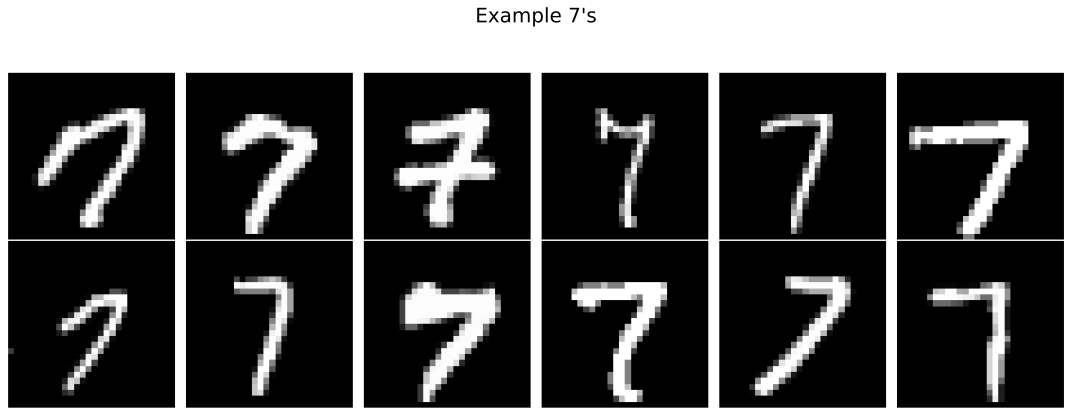

In [18]:
# let's see some example 7s

# find indices of all the 7's in the dataset
the7s = np.where(labels==7)[0]

# draw the first 12
fig,axs = plt.subplots(2,6,figsize=(15,6))

for i,ax in enumerate(axs.flatten()):
  img = np.reshape(data[the7s[i],:],(28,28))
  ax.imshow(img,cmap='gray')
  ax.axis('off')

plt.suptitle("Example 7's",fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

(2126, 784)
2126
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


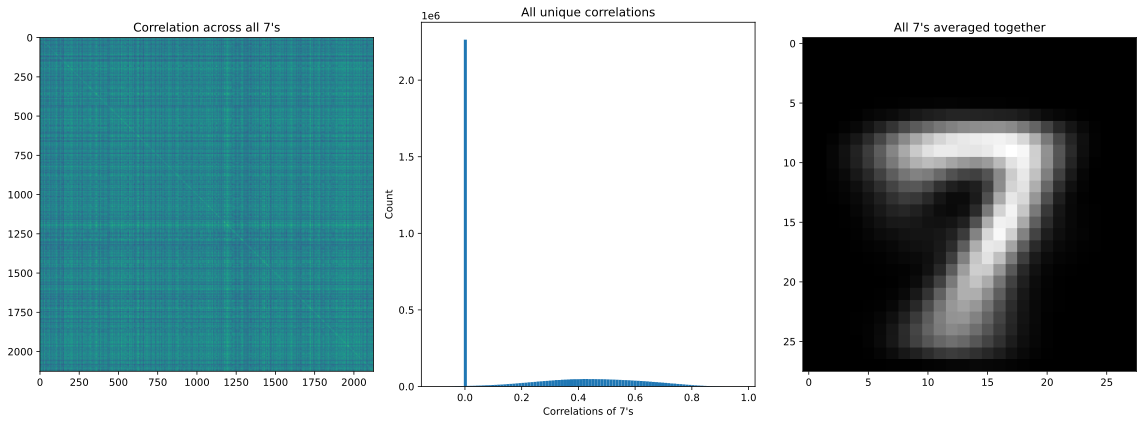

In [23]:
# how similar are all the 7's? 

# how many 7's are there?
print(data[the7s, :].shape)
print(len(the7s)) # test
print(data[the7s]) # test


# let's see how they relate to each other by computing spatial correlations
# we're going to correlate their RELATIONSHIP.
C = np.corrcoef(data[the7s,:])

# and visualize
# as we know there are over 2000 images of 7
# so we want to know the SIMILARITY between the "7 image" at index 250 and the one at index 500, and the rest of other 7's
fig,ax = plt.subplots(1,3,figsize=(16,6))
ax[0].imshow(C,vmin=0,vmax=1)
ax[0].set_title("Correlation across all 7's")

# Since we want 7 images not too different and not too similar (to feed into a model)
# So corrcoef about 0.5 is best for training a model
# let's plot the amount of corrcoef in histogram 

# k = 0 by default
# but we use k = 1 since k = 0 is just bunce of images that corrcoef to themselves
upperCorr = np.triu(C,k=1).flatten()

# here we filter out the "0" corrcoef because there are way too much of it
# it's also resonable to do that since after we use np.triu
# it will ZERO OUT the BELOW CORRCOEF.
ax[1].hist(upperCorr[upperCorr!=0],bins=100)
ax[1].set_title('All unique correlations')
ax[1].set_xlabel("Correlations of 7's")
ax[1].set_ylabel('Count')

# show all 7's together
# average all values vertically (all columns)
# do the same thing for 784 pixels horizontally (rows)
# we get a new array of 784 averaged pixels --> reshape into 28x28 image 
aveAll7s = np.reshape( np.mean(data[the7s,:],axis=0) ,(28,28))
ax[2].imshow(aveAll7s,cmap='gray')
ax[2].set_title("All 7's averaged together")

# if the averaged image is spread out reasonably, then we know our data is good to feed into model
# we don't want the image to be too precise (all data are too similar)
# or we don't want to be too spread out (all data are too far different from each other)

plt.tight_layout()
plt.show()